In [4]:
from functions import *
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [5]:
data5 = load_data("bianconi-barabasi_10000_5").fillna(method="ffill")

Loading dataset: Completed!


In [6]:
data10 = load_data("bianconi-barabasi_10000_10").fillna(method="ffill")

Loading dataset: Completed!


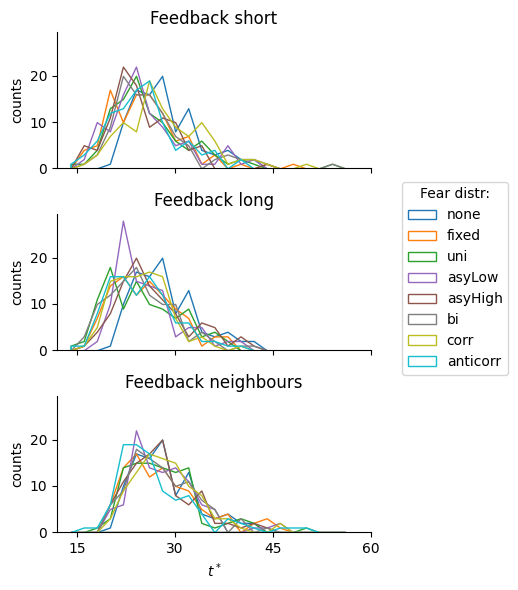

In [63]:
feedbacks = ["short","long","neighbours"]

labels = np.array(["none",'fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
bins = np.linspace(13,57,23)

fig, axs = plt.subplots(3,1, figsize=(4,6), sharex=True, sharey=True)

for j,feedback in enumerate(feedbacks):
    data = [
        data10.xs(("none","none","none"),level=[0,1,2]).xs("I",axis=1,level="compartment")
    ] + [
        data10.xs(("cut",label,feedback),level=[0,1,2]).xs("I",axis=1,level="compartment")
        for label in labels if label != "none"
    ]
    for i,df in enumerate(data):
        sb.histplot(x=df.index[df.apply(np.argmax).to_numpy()], bins=bins, color=mycolors[i], element="poly", alpha=0, label=labels[i], ax=axs[j])

for i,ax in enumerate(axs):
    ax.set_title(f"Feedback {feedbacks[i]}")
    ax.spines[["top","right"]].set_visible(False)
    ax.set_xlabel(r"$t^*$")
    ax.set_ylabel("counts")
    ax.set_xticks(np.linspace(15,60,4))

legend = fig.legend(handles=axs[0].collections, title="Fear distr:", bbox_to_anchor=(1.3,0.7))
fig.tight_layout()
fig.savefig("plots/reaction/cut_peakloc.png", bbox_extra_artists=(legend,), bbox_inches="tight")
fig.savefig("plots/reaction/cut_peakloc.pdf", bbox_extra_artists=(legend,), bbox_inches="tight")

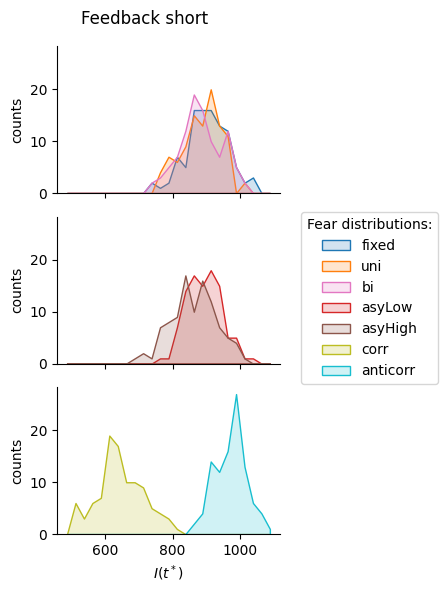

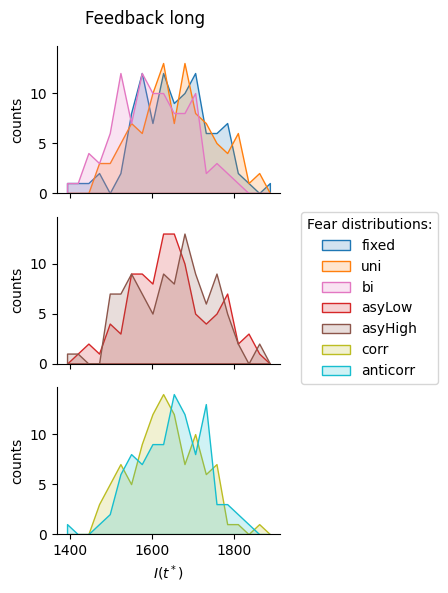

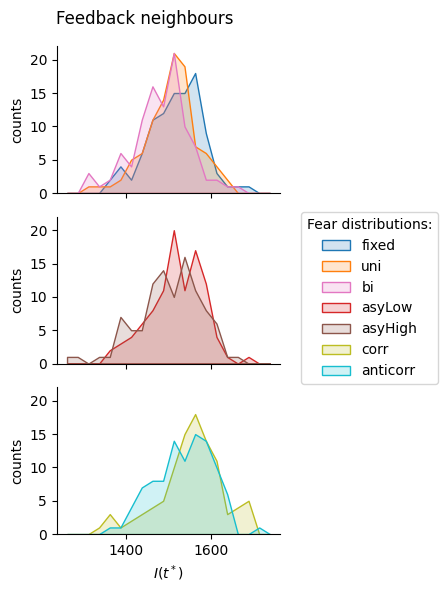

In [68]:
feedbacks = ["short","long","neighbours"]

labels = np.array(['fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
bins = [np.linspace(475,1100,26),np.linspace(1380,1900,21),np.linspace(1250,1750,21)]
idxplot = {'fixed':0, 'uni':0, 'asyLow':1, 'asyHigh':1, 'bi':0, 'corr':2, 'anticorr':2}

for j,feedback in enumerate(feedbacks):
    fig, axs = plt.subplots(3,1, figsize=(3,6), sharex=True, sharey=True)
    data = [
        data10.xs(("cut",label,feedback),level=[0,1,2]).xs("I",axis=1,level="compartment")
        for label in labels if label != "none"
    ]
    for i,df in enumerate(data):
        sb.histplot(x=df.apply(np.max), bins=bins[j], color=mycolors[i], alpha=0.2, element="poly", label=labels[i], ax=axs[idxplot[labels[i]]])

    for ax in axs:
        ax.set_xlabel(r"$I(t^*)$")
        ax.spines[["top","right"]].set_visible(False)
        ax.set_ylabel("counts")
    title = fig.suptitle(f"Feedback {feedback}")
    legend = fig.legend(loc="center right", title="Fear distributions:", bbox_to_anchor=(1.5,0.5))
    fig.tight_layout()
    fig.savefig(f"plots/reaction/cut_feedback{feedback}_peak.png", bbox_extra_artists=(legend,title), bbox_inches="tight")
    fig.savefig(f"plots/reaction/cut_feedback{feedback}_peak.pdf", bbox_extra_artists=(legend,title), bbox_inches="tight")

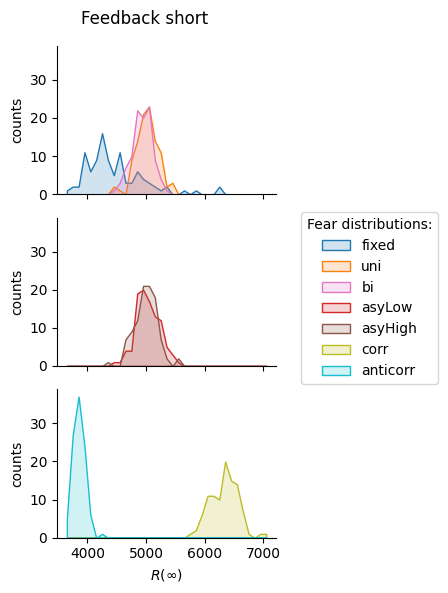

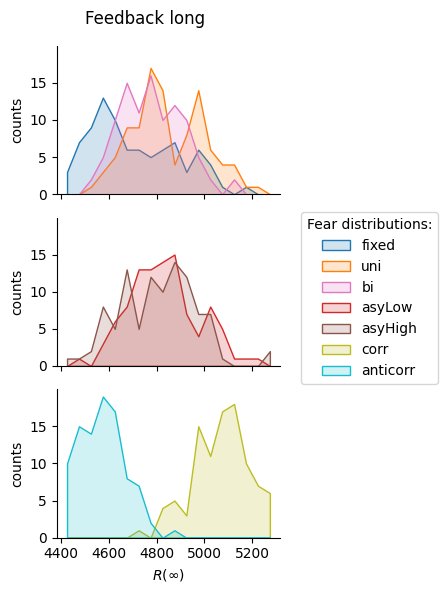

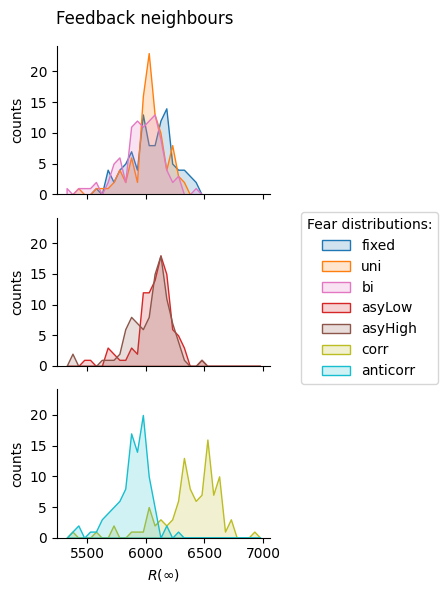

In [67]:
feedbacks = ["short","long","neighbours"]

labels = np.array(['fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
bins = [np.arange(3600,7101,100),np.arange(4400,5301,50),np.arange(5300,7001,50)]
idxplot = {'fixed':0, 'uni':0, 'asyLow':1, 'asyHigh':1, 'bi':0, 'corr':2, 'anticorr':2}

for j,feedback in enumerate(feedbacks):
    fig, axs = plt.subplots(3,1, figsize=(3,6), sharex=True, sharey=True)
    data = [
        data10.xs(("cut",label,feedback),level=[0,1,2]).xs("R",axis=1,level="compartment")
        for label in labels if label != "none"
    ]
    for i,df in enumerate(data):
        sb.histplot(x=df.iloc[-1], bins=bins[j], color=mycolors[i], alpha=0.2, element="poly", label=labels[i], ax=axs[idxplot[labels[i]]])

    for ax in axs:
        ax.set_xlabel(r"$R(\infty)$")
        ax.spines[["top","right"]].set_visible(False)
        ax.set_ylabel("counts")
    title = fig.suptitle(f"Feedback {feedback}")
    legend = fig.legend(loc="center right", title="Fear distributions:", bbox_to_anchor=(1.5,0.5))
    fig.tight_layout()
    fig.savefig(f"plots/reaction/cut_feedback{feedback}_attackrate.png", bbox_extra_artists=(legend,title), bbox_inches="tight")
    fig.savefig(f"plots/reaction/cut_feedback{feedback}_attackrate.pdf", bbox_extra_artists=(legend,title), bbox_inches="tight")

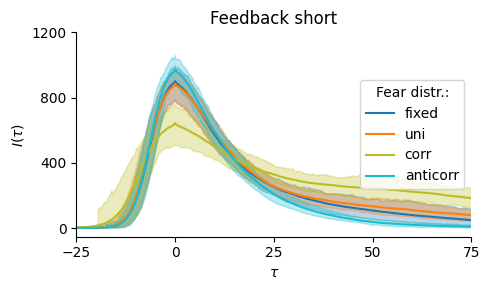

In [25]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

labels = np.array(['fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
indices = [0,1,5,6]
data = [
    mean_quantiles(offset_at_peak(data10.xs(("cut",label,"short"),level=[0,1,2]).xs("I",axis=1,level="compartment")), CI=0.9)
    for label in labels
]

for i,df in enumerate(data):
    if i in indices:
        ax.plot(df["mean"], color=mycolors[i], label=labels[i])
        ax.fill_between(df.index, df["low"], df["high"], color=mycolors[i], alpha=0.3)

ax.set_title("Feedback short")
ax.set_xlabel(r"$\tau$")
ax.set_xlim([-25,75])
ax.set_xticks(np.linspace(-25,75,5))
ax.spines[["top","right"]].set_visible(False)
ax.set_ylabel(r"$I(\tau)$")
ax.set_yticks(np.linspace(0,1200,4))
ax.legend(loc="center right", title="Fear distr.:")

fig.tight_layout()
fig.savefig("plots/reaction/cut_corr_anticorr_evolution.png")
fig.savefig("plots/reaction/cut_corr_anticorr_evolution.pdf")

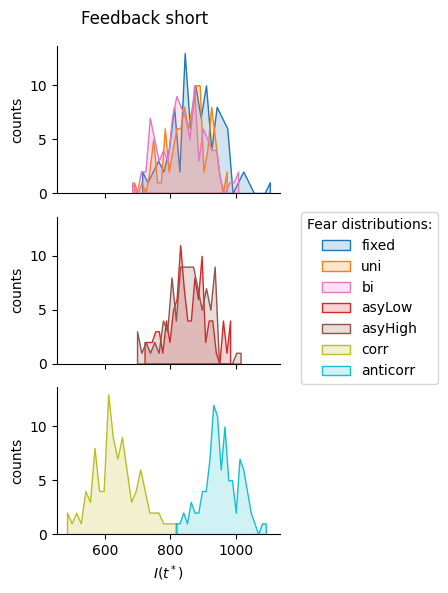

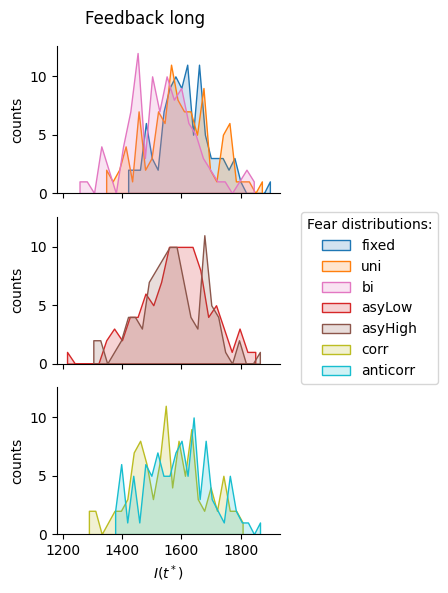

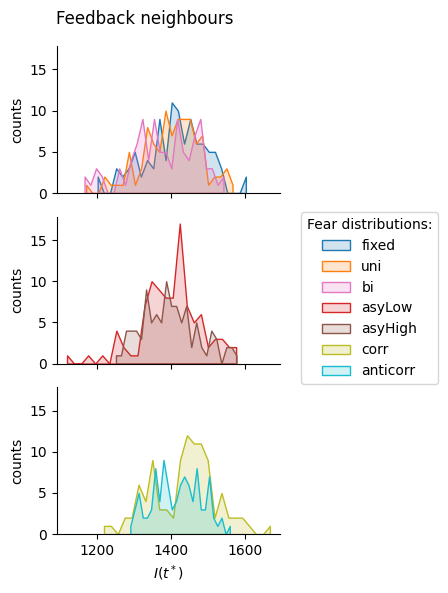

In [10]:
feedbacks = ["short","long","neighbours"]

labels = np.array(['fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
bins = [25,25,25]#[np.linspace(475,1100,26),np.linspace(1380,1900,21),np.linspace(1250,1750,21)]
idxplot = {'fixed':0, 'uni':0, 'asyLow':1, 'asyHigh':1, 'bi':0, 'corr':2, 'anticorr':2}

for j,feedback in enumerate(feedbacks):
    fig, axs = plt.subplots(3,1, figsize=(3,6), sharex=True, sharey=True)
    data = [
        data5.xs(("cut",label,feedback),level=[0,1,2]).xs("I",axis=1,level="compartment")
        for label in labels if label != "none"
    ]
    for i,df in enumerate(data):
        sb.histplot(x=df.apply(np.max), bins=bins[j], color=mycolors[i], alpha=0.2, element="poly", label=labels[i], ax=axs[idxplot[labels[i]]])

    for ax in axs:
        ax.set_xlabel(r"$I(t^*)$")
        ax.spines[["top","right"]].set_visible(False)
        ax.set_ylabel("counts")
    title = fig.suptitle(f"Feedback {feedback}")
    legend = fig.legend(loc="center right", title="Fear distributions:", bbox_to_anchor=(1.5,0.5))
    fig.tight_layout()

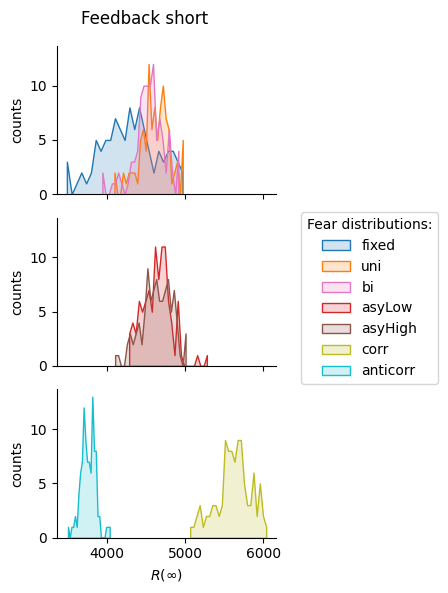

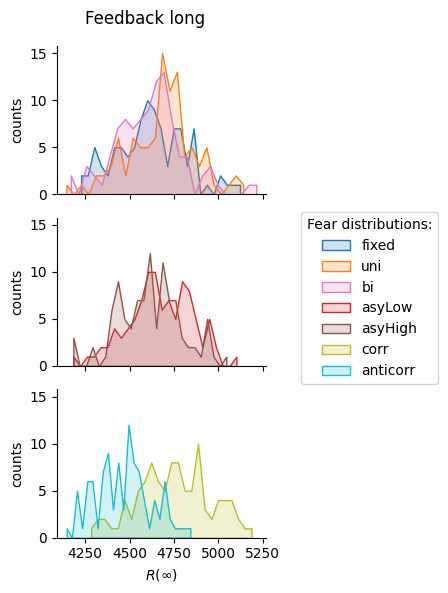

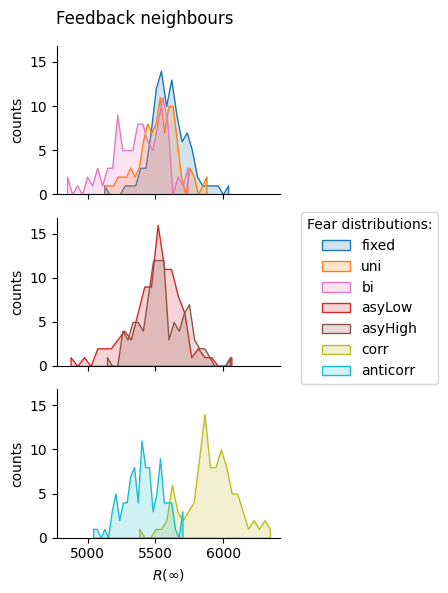

In [11]:
feedbacks = ["short","long","neighbours"]

labels = np.array(['fixed', 'uni', 'asyLow', 'asyHigh', 'bi', 'corr', 'anticorr'])
mycolors = plt.cm.tab10(np.linspace(0,1,len(labels)))
bins = [25,25,25]#[np.arange(3600,7101,100),np.arange(4400,5301,50),np.arange(5300,7001,50)]
idxplot = {'fixed':0, 'uni':0, 'asyLow':1, 'asyHigh':1, 'bi':0, 'corr':2, 'anticorr':2}

for j,feedback in enumerate(feedbacks):
    fig, axs = plt.subplots(3,1, figsize=(3,6), sharex=True, sharey=True)
    data = [
        data5.xs(("cut",label,feedback),level=[0,1,2]).xs("R",axis=1,level="compartment")
        for label in labels if label != "none"
    ]
    for i,df in enumerate(data):
        sb.histplot(x=df.iloc[-1], bins=bins[j], color=mycolors[i], alpha=0.2, element="poly", label=labels[i], ax=axs[idxplot[labels[i]]])

    for ax in axs:
        ax.set_xlabel(r"$R(\infty)$")
        ax.spines[["top","right"]].set_visible(False)
        ax.set_ylabel("counts")
    title = fig.suptitle(f"Feedback {feedback}")
    legend = fig.legend(loc="center right", title="Fear distributions:", bbox_to_anchor=(1.5,0.5))
    fig.tight_layout()